# Import all parameters

In [32]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [34]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
diabetes_dataset = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [35]:
diabetes_dataset.shape

(768, 9)

In [36]:
diabetes_dataset.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [37]:
diabetes_dataset.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [43]:
#for better understanding i have dropped some columns
df1 = diabetes_dataset.drop(columns=['preg','skin','mass','pedi','pres','test'],axis =1)
df1.sample()

,plas,age,class
441,83,22,0


In [45]:
#Now lets check whether the columns contain any Null values
df1.isnull().sum()

plas     0
age      0
class    0
dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X = df1.drop('class',axis = 1)
y = df1['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state= 100)


In [55]:
#checking the shape of the train test data
X_train.shape,X_test.shape

((537, 2), (231, 2))

# Standardization

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [57]:
scaler.fit(X_train)

StandardScaler()

In [58]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns= X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns= X_test.columns)

In [60]:
scaler.mean_ #mean of original data

array([120.59404097,  33.12476723])

In [61]:
X_train.describe()

,plas,age
count,537.000000,537.000000
mean,120.594041,33.124767
std,32.071733,11.585716
min,0.000000,21.000000
25%,100.000000,24.000000
50%,116.000000,29.000000
75%,140.000000,40.000000
max,199.000000,72.000000


In [62]:
#After scaling
np.round(X_train_scaled.describe(),1)

,plas,age
count,537.0,537.0
mean,0.0,0.0
std,1.0,1.0
min,-3.8,-1.0
25%,-0.6,-0.8
50%,-0.1,-0.4
75%,0.6,0.6
max,2.4,3.4


# Visualisation

<AxesSubplot:xlabel='age', ylabel='Density'>

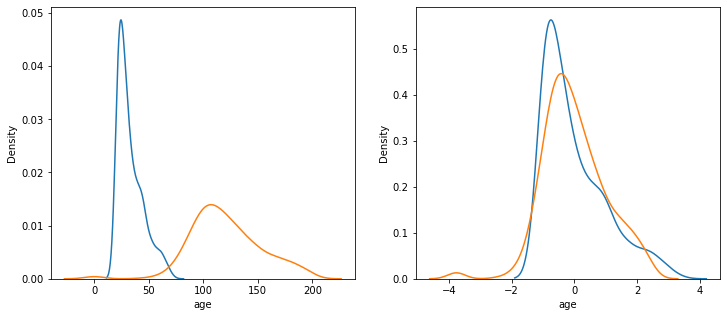

In [64]:
# Check the data distribution before and after scaling
fig,(ax1,ax2) = plt.subplots(ncols= 2,figsize = (12,5))

#Before Scaling
sns.kdeplot(X_train['age'],ax = ax1)
sns.kdeplot(X_train['plas'],ax = ax1)
# After Scaling
sns.kdeplot(X_train_scaled['age'],ax = ax2)
sns.kdeplot(X_train_scaled['plas'],ax = ax2)

# Initialize and load models

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.

Each algorithm is given a short name, useful for summarizing results afterward

In [65]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Running the example provides a list of each algorithm short name, the mean accuracy and the standard deviation accuracy.

In [69]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = model_selection.KFold(n_splits=10, random_state=None)
 cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.738363 (0.054885)
LDA: 0.739679 (0.052825)
KNN: 0.726606 (0.063210)
CART: 0.682331 (0.051573)
NB: 0.742259 (0.056247)
SVM: 0.748735 (0.060220)


The example also provides a box and whisker plot showing the spread of the accuracy scores across each cross validation fold for each algorithm.

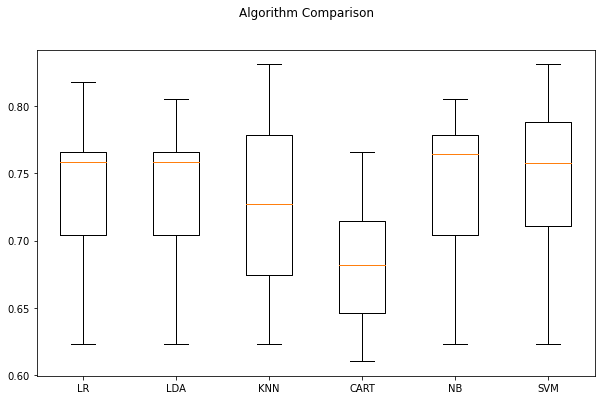

In [70]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

This post is for explaining how to compare multiple machine learning algorithms on a dataset using Python and scikit-learn.
We can learn how to evaluate the algorithms using the same testing framework, and how to present the results through numerical summaries and box-and-whisker plots.
You can now use this knowledge as a starting point to evaluate multiple algorithms on your own problems.